In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
training_file_path = 'train.xlsx'
training_data = pd.read_excel(training_file_path)
training_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2


In [3]:
testing_file_path = 'test.xlsx'
testing_data = pd.read_excel(testing_file_path)
testing_data 

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [4]:
training_features = training_data.drop('target', axis=1)
scaler = StandardScaler()
normalized_training_features = scaler.fit_transform(training_features)

In [5]:
normalized_training_features

array([[-0.47321406,  0.39508167, -0.17481688, ..., -1.03062689,
         0.28899656, -0.98195758],
       [-1.27438905, -1.06322685, -0.78798229, ...,  0.10784997,
         1.28186418,  0.33869147],
       [ 1.47249662,  2.97516597,  1.17414703, ...,  0.39246918,
        -0.20743726, -0.98195758],
       ...,
       [ 2.73148589,  0.7316144 , -0.91061537, ..., -0.55626153,
        -0.90244459, -0.69896135],
       [ 1.81585733,  1.62903503, -0.6653492 , ..., -0.93575382,
        -0.60458431, -1.35928588],
       [-0.01539979,  0.05854893, -0.6653492 , ...,  0.29759611,
        -0.10815049,  0.15002732]])

In [6]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_training_features)
training_data['Cluster'] = kmeans.labels_

In [7]:
training_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target,Cluster
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37,0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61,1
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19,0
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22,2
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34,2
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15,0
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6,2
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2,2


In [8]:
normalized_testing_features = scaler.transform(testing_data)
normalized_testing_features

array([[-1.15993548, -2.07282506, -0.6653492 , ..., -0.55626153,
         0.58685684,  0.6216877 ],
       [ 0.90022877,  0.84379198, -1.64641386, ..., -1.78961146,
        -0.80315783, -1.2649538 ],
       [-0.47321406, -0.61451654, -0.78798229, ..., -1.03062689,
         0.88471713, -0.32163305],
       ...,
       [-1.15993548, -0.2779838 , -0.54271612, ..., -0.17676925,
         1.08329065,  1.18768015],
       [-0.35876049, -1.51193717, -0.05218379, ...,  0.0129769 ,
        -0.00886373, -0.22730098],
       [-0.93102834, -0.39016138, -0.6653492 , ...,  0.6770884 ,
         1.38115094,  0.999016  ]])

In [9]:
testing_data['Predicted Cluster'] = kmeans.predict(normalized_testing_features)
testing_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,Predicted Cluster
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60,1
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80,2
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70,1
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65,0
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51,1
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64,0
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54,1
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69,0


In [10]:
silhouette = silhouette_score(normalized_testing_features, testing_data['Predicted Cluster'])
silhouette 

0.22082621028743143

In [11]:
# Example of predicting cluster membership for a new data point
new_data_point = np.array([-65, -55, -60, -50, -48, -58, -75, -55, -70, -73, -60, -62, -55, -56, -68, -70, -58, -72])
normalized_new_data_point = scaler.transform(new_data_point.reshape(1, -1))
predicted_cluster = kmeans.predict(normalized_new_data_point)[0]
predicted_cluster

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

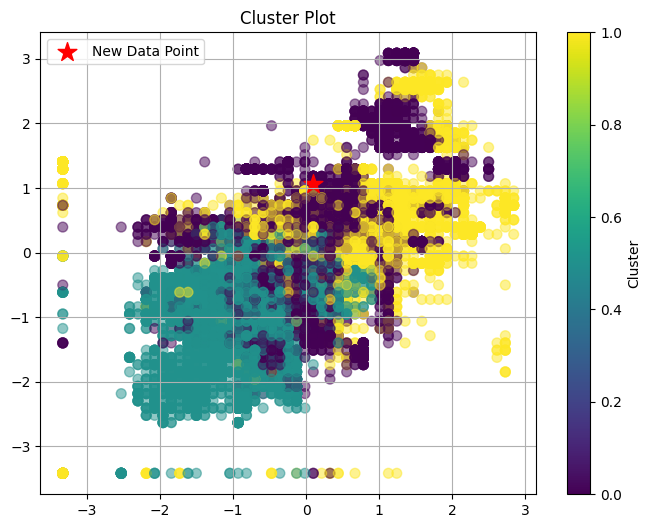

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(normalized_training_features[:, 0], normalized_training_features[:, 1], c=training_data['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.scatter(normalized_new_data_point[:, 0], normalized_new_data_point[:, 1], c='red', marker='*', s=200, label='New Data Point')

plt.title('Cluster Plot')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()